In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('터미널과 선박의 주기성.csv')

In [2]:
df_new = df.rename(columns={'Unnamed: 0':'TERMINAL','Unnamed: 1':'Boat'})
df_new.head()

,TERMINAL,Boat,시간 차,주기(시간 차 평균),방문 횟수
0,BNCT,CATO,"[121730.0, 119434.0, 123300.0, 108905.0, 11344...",115594.000000,7
1,BNCT,CSYH,"[979130.0, 12135.0, 13685.0, 14065.0, 22225.0,...",56707.391304,24
2,BNCT,CALB,"[131238.0, 121212.0, 119808.0, 126312.0, 12628...",127620.000000,10
3,BNCT,AEI4,"[9600.0, 51715.0, 15710.0, 44820.0, 10895.0, 4...",42811.093750,33
4,BNCT,CQYH,"[14325.0, 11000.0, 12425.0, 20870.0, 12410.0, ...",14058.666667,76


In [3]:
df_new.drop(columns = ['시간 차'],inplace = True)
df_new

,TERMINAL,Boat,주기(시간 차 평균),방문 횟수
0,BNCT,CATO,115594.000000,7
1,BNCT,CSYH,56707.391304,24
2,BNCT,CALB,127620.000000,10
3,BNCT,AEI4,42811.093750,33
4,BNCT,CQYH,14058.666667,76
...,...,...,...,...
4717,IFPC,MVAL,7941.375000,81
4718,BCT,SKNT,8820.000000,2
4719,BCT,DJFD,22464.000000,6
4720,BCT,IIEM,19860.000000,2


In [4]:
#터미널 별 방문회수가 가장 많은 배, 주기가 짧은 배

In [5]:
df_1 = df_new.groupby(['TERMINAL'],as_index = False).min()
df_1

,TERMINAL,Boat,주기(시간 차 평균),방문 횟수
0,BCT,DJFD,8820.000000,2
1,BIT,ACVG,1200.000000,2
2,BNCT,ACAV,336.000000,2
3,BNMT,BODI,4320.000000,2
4,BPTC,ACVG,270.000000,2
5,DDCT,ACLB,14181.081081,2
6,DPCT,ACAV,0.000000,2
7,E1CT,ACMI,4833.333333,2
8,GWCT,ACVG,5424.000000,2
9,HJIT,ACHK,4506.666667,2


In [6]:
list_name = list(df_1['TERMINAL'].unique())

In [7]:
df_1[df_1['TERMINAL']=='BCT']['주기(시간 차 평균)'].min()

8820.0

In [9]:
df_1.head()

,TERMINAL,Boat,주기(시간 차 평균),방문 횟수
0,BCT,DJFD,8820.0,2
1,BIT,ACVG,1200.0,2
2,BNCT,ACAV,336.0,2
3,BNMT,BODI,4320.0,2
4,BPTC,ACVG,270.0,2


In [10]:
df_1[df_1['TERMINAL']=='BCT']

,TERMINAL,Boat,주기(시간 차 평균),방문 횟수
0,BCT,DJFD,8820.0,2


In [22]:
###항구별 방문 횟수 최소 
def min_visit(a):
    return(a,df_1[df_1['방문 횟수'] == df_1[df_1['TERMINAL'] == a]['방문 횟수'].min()]['Boat'],df_1[df_1['TERMINAL'] == a]['방문 횟수'].min())

In [41]:
min_visit('BNCT')

('BNCT',
 0     DJFD
 1     ACVG
 2     ACAV
 3     BODI
 4     ACVG
 5     ACLB
 6     ACAV
 7     ACMI
 8     ACVG
 9     ACHK
 10    ACLF
 11    ACAT
 12    A2JJ
 13    ACRS
 15    COTW
 16    ACVG
 17    ACV4
 18    ACVG
 19    AASO
 21    ACAV
 22    CACB
 23    ACAL
 24    ASCM
 Name: Boat, dtype: object,
 2)

In [30]:
##항구별 방문 최대 횟수
def max_visit(a):
    return(a,df_1[df_1['방문 횟수'] == df_1[df_1['TERMINAL'] == a]['방문 횟수'].max()]['Boat'],df_1[df_1['TERMINAL'] == a]['방문 횟수'].max())

In [45]:
max_visit('BNCT')

('BNCT',
 0     DJFD
 1     ACVG
 2     ACAV
 3     BODI
 4     ACVG
 5     ACLB
 6     ACAV
 7     ACMI
 8     ACVG
 9     ACHK
 10    ACLF
 11    ACAT
 12    A2JJ
 13    ACRS
 15    COTW
 16    ACVG
 17    ACV4
 18    ACVG
 19    AASO
 21    ACAV
 22    CACB
 23    ACAL
 24    ASCM
 Name: Boat, dtype: object,
 2)

In [34]:
list_min_time = []
for i in list_name:
    list_min_time.append(min_time(i))
    
list_min_time

[('BCT', 8820.0),
 ('BIT', 1200.0),
 ('BNCT', 336.0),
 ('BNMT', 4320.0),
 ('BPTC', 270.0),
 ('DDCT', 14181.081081081082),
 ('DPCT', 0.0),
 ('E1CT', 4833.333333333333),
 ('GWCT', 5424.0),
 ('HJIT', 4506.666666666667),
 ('HJNC', 0.0),
 ('HKTL', 5280.0),
 ('HPNT', 7254.0),
 ('ICT', 16410.0),
 ('IFPC', 5760.0),
 ('IGCT', 8100.0),
 ('JUCT', 11100.0),
 ('KITL', 2023.0),
 ('PCTC', 0.0),
 ('PNC', 5996.555555555556),
 ('PNCT', 3657.552742616034),
 ('PNIT', 6600.0),
 ('SMGT', 9584.666666666666),
 ('SNCT', 72.0),
 ('UNCT', 11166.020408163266)]

In [49]:
###항구별 주기(시간 차 평균) 최소 
def min_time(a):
    return(a,df_1[df_1['주기(시간 차 평균)'] == df_1[df_1['TERMINAL'] == a]['주기(시간 차 평균)'].min()]['Boat'],df_1[df_1['TERMINAL'] == a]['주기(시간 차 평균)'].min())

In [50]:
df_1[df_1['주기(시간 차 평균)'] == df_1[df_1['TERMINAL'] == a]['주기(시간 차 평균)'].min()]['Boat']

NameError: name 'a' is not defined

In [51]:
min_time('BCT')

('BCT',
 0    DJFD
 Name: Boat, dtype: object,
 8820.0)

In [52]:
df_time = df_new.drop(columns = ['방문 횟수'])
df_time

,TERMINAL,Boat,주기(시간 차 평균)
0,BNCT,CATO,115594.000000
1,BNCT,CSYH,56707.391304
2,BNCT,CALB,127620.000000
3,BNCT,AEI4,42811.093750
4,BNCT,CQYH,14058.666667
...,...,...,...
4717,IFPC,MVAL,7941.375000
4718,BCT,SKNT,8820.000000
4719,BCT,DJFD,22464.000000
4720,BCT,IIEM,19860.000000


In [79]:
#터미널 별 주기 최소 보트
df_time_min = df_time.groupby('TERMINAL').min()
df_time_min.rename(columns={'Boat':'최소 주기 보트'},inplace = True)

In [54]:
#터미널 별 주기 최대 보트
df_time_max = df_time.groupby('TERMINAL').max()

In [55]:
df_visit = df_new.drop(columns = ['주기(시간 차 평균)'])
df_visit

,TERMINAL,Boat,방문 횟수
0,BNCT,CATO,7
1,BNCT,CSYH,24
2,BNCT,CALB,10
3,BNCT,AEI4,33
4,BNCT,CQYH,76
...,...,...,...
4717,IFPC,MVAL,81
4718,BCT,SKNT,2
4719,BCT,DJFD,6
4720,BCT,IIEM,2


In [56]:
#터미널 별 방문횟수 최소 보트
df_visit_min = df_visit.groupby('TERMINAL').min()

In [76]:
#터미널 별 방문횟수 최대 보트
df_visit_max = df_visit.groupby('TERMINAL').max()
df_visit_max.rename(columns={'Boat':'최다 방문 보트'},inplace = True)

df_visit_max

,최다 방문 보트,방문 횟수
TERMINAL,,
BCT,SKNT,6
BIT,ZWYS,121
BNCT,XREN,102
BNMT,ZEYA,204
BPTC,ZGRZ,234
DDCT,STSD,38
DPCT,ZQGD,119
E1CT,TYRX,115
GWCT,ZWYS,105


In [58]:
df_min = df_new.groupby('TERMINAL').min()
df_min

,Boat,주기(시간 차 평균),방문 횟수
TERMINAL,,,
BCT,DJFD,8820.000000,2
BIT,ACVG,1200.000000,2
BNCT,ACAV,336.000000,2
BNMT,BODI,4320.000000,2
BPTC,ACVG,270.000000,2
DDCT,ACLB,14181.081081,2
DPCT,ACAV,0.000000,2
E1CT,ACMI,4833.333333,2
GWCT,ACVG,5424.000000,2


In [59]:
df_max = df_new.groupby('TERMINAL').max()
df_max

,Boat,주기(시간 차 평균),방문 횟수
TERMINAL,,,
BCT,SKNT,2.844000e+04,6
BIT,ZWYS,7.974600e+05,121
BNCT,XREN,8.574000e+05,102
BNMT,ZEYA,5.220600e+05,204
BPTC,ZGRZ,1.190890e+06,234
DDCT,STSD,3.342000e+05,38
DPCT,ZQGD,1.063440e+06,119
E1CT,TYRX,3.138750e+05,115
GWCT,ZWYS,1.249182e+06,105


In [140]:
df_final = pd.concat([df_visit_max,df_time_min],axis = 1)
df_final

,최다 방문 보트,방문 횟수,최소 주기 보트,주기(시간 차 평균)
TERMINAL,,,,
BCT,SKNT,6,DJFD,8820.000000
BIT,ZWYS,121,ACVG,1200.000000
BNCT,XREN,102,ACAV,336.000000
BNMT,ZEYA,204,BODI,4320.000000
BPTC,ZGRZ,234,ACVG,270.000000
DDCT,STSD,38,ACLB,14181.081081
DPCT,ZQGD,119,ACAV,0.000000
E1CT,TYRX,115,ACMI,4833.333333
GWCT,ZWYS,105,ACVG,5424.000000


In [118]:
df_final['최다 방문 보트']

TERMINAL
BCT     SKNT
BIT     ZWYS
BNCT    XREN
BNMT    ZEYA
BPTC    ZGRZ
DDCT    STSD
DPCT    ZQGD
E1CT    TYRX
GWCT    ZWYS
HJIT    ZSG6
HJNC    ZZVG
HKTL    YOKB
HPNT    ZIZ5
ICT     ZBRA
IFPC    QIFR
IGCT    XISN
JUCT    YTTR
KITL    YOKB
PCTC    XMSH
PNC     ZZTD
PNCT    TMPZ
PNIT    ZZTD
SMGT    ZWYS
SNCT    YTTR
UNCT    XNXA
Name: 최다 방문 보트, dtype: object

In [65]:
df_final.index

Index(['BCT', 'BIT', 'BNCT', 'BNMT', 'BPTC', 'DDCT', 'DPCT', 'E1CT', 'GWCT',
       'HJIT', 'HJNC', 'HKTL', 'HPNT', 'ICT', 'IFPC', 'IGCT', 'JUCT', 'KITL',
       'PCTC', 'PNC', 'PNCT', 'PNIT', 'SMGT', 'SNCT', 'UNCT'],
      dtype='object', name='TERMINAL')

In [66]:
df_index = ['BCT', 'BIT', 'BNCT', 'BNMT', 'BPTC', 'DDCT', 'DPCT', 'E1CT', 'GWCT',
       'HJIT', 'HJNC', 'HKTL', 'HPNT', 'ICT', 'IFPC', 'IGCT', 'JUCT', 'KITL',
       'PCTC', 'PNC', 'PNCT', 'PNIT', 'SMGT', 'SNCT', 'UNCT']

In [69]:
import matplotlib.pyplot as plt

<ipython-input-139-af95137be566>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


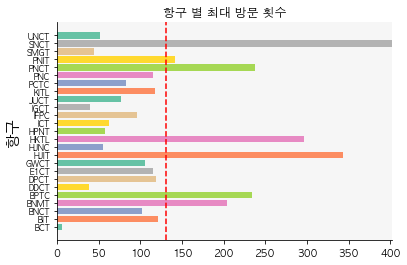

In [139]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

plt.title('항구 별 최대 방문 횟수')

colors = sns.color_palette('Set2',len(df_index))
plt.barh(df_index, df_final['방문 횟수'],color = colors)
plt.ylabel('항구',fontsize = 15)
plt.yticks(fontsize = 8)

ax = plt.subplot()

ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(0.2)

ax.margins(x=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axvline(df_final['방문 횟수'].mean(),c='r',ls = '--')


plt.show()

<ipython-input-138-17b2e094e284>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


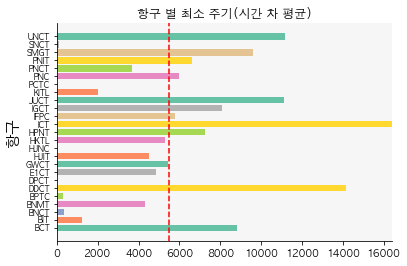

In [138]:
from matplotlib import rc 
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False

plt.title('항구 별 최소 주기(시간 차 평균)')

colors = sns.color_palette('Set2',len(df_index))
plt.barh(df_index, df_final['주기(시간 차 평균)'],color = colors)
plt.ylabel('항구',fontsize = 15)
plt.yticks(fontsize = 8)

ax = plt.subplot()

ax.patch.set_facecolor('lightgrey')
ax.patch.set_alpha(0.2)

ax.margins(x=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.axvline(df_final['주기(시간 차 평균)'].mean(),c='r',ls = '--')


plt.show()

In [86]:
import seaborn as sns

In [111]:
colors = sns.color_palette('Set2',len(df_index))

In [147]:
data = pd.read_csv('전처리완료데이터.csv')
data.head(3)

,Unnamed: 0,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,0,0,0,3,480.0,2019,12,31,17,196
2,3,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,0,0,0,6,1260.0,2019,12,31,11,1896


In [148]:
data_1 = data.groupby(['TERMINAL','입항년도'],as_index = False).mean()
data_1

,TERMINAL,입항년도,Unnamed: 0,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항월,입항일,입항시,총 작업량
0,BCT,2022,68647.529412,3.539610e+06,5.205882,391.411765,168.705882,5.470588,27.729323,0.000000,...,0.0,2.0,0.0,0.0,0.0,997.058824,7.764706,17.411765,15.205882,565.588235
1,BIT,2019,28.750000,1.199402e+06,29.750000,518.750000,720.250000,0.000000,1.075000,0.000000,...,0.0,0.0,0.0,0.0,4.0,1930.000000,12.000000,31.000000,8.000000,1239.000000
2,BIT,2020,12876.917492,1.460523e+06,16.507701,265.519252,281.251375,0.000000,15.127393,0.194114,...,0.0,0.0,0.0,0.0,4.0,909.130363,6.439494,15.882288,11.158416,546.770627
3,BIT,2021,39043.062030,2.635016e+06,13.708647,303.760025,330.079574,0.000000,15.688784,0.157080,...,0.0,0.0,0.0,0.0,4.0,1082.461153,6.448622,15.911028,11.083960,633.839599
4,BIT,2022,60877.951287,3.413337e+06,8.816176,315.462316,340.482537,0.000000,15.504177,0.135417,...,0.0,0.0,0.0,0.0,4.0,1133.061581,4.405331,15.035846,10.345588,655.944853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,SNCT,2020,13008.202338,1.463122e+06,25.719424,302.235612,308.680755,0.580036,12.907104,0.079496,...,0.0,0.0,2.0,1.0,0.0,820.919964,6.525180,15.910971,12.146583,611.496403
74,SNCT,2021,39291.635827,2.653885e+06,25.817913,322.816929,341.158465,1.482283,13.441339,0.061220,...,0.0,0.0,2.0,1.0,0.0,886.238189,6.585630,16.082677,12.000000,665.457677
75,SNCT,2022,61548.499293,3.424834e+06,15.936351,289.216407,308.700141,1.311174,14.558932,0.187444,...,0.0,0.0,2.0,1.0,0.0,803.321075,4.718529,15.875530,11.373409,599.227723
76,UNCT,2021,46342.109453,3.164277e+06,16.910448,147.616915,122.766169,0.000000,16.230100,0.133333,...,0.0,4.0,0.0,0.0,0.0,849.124378,9.950249,15.736318,11.477612,270.383085


In [218]:
data_1[data_1['입항년도']==2019]

,TERMINAL,입항년도,Unnamed: 0,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항월,입항일,입항시,총 작업량
1,BIT,2019,28.750000,1.199402e+06,29.750000,518.750000,720.250000,0.000000,1.075000,0.00,...,0.0,0.0,0.0,0.0,4.0,1930.000000,12.0,31.000000,8.000000,1239.000000
5,BNCT,2019,25.000000,1.199334e+06,9.000000,1029.000000,932.000000,117.333333,6.300000,0.00,...,0.0,0.0,0.0,0.0,4.0,1915.333333,12.0,30.333333,16.666667,2078.333333
12,BPTC,2019,25.750000,1.199310e+06,11.500000,429.750000,501.250000,0.000000,0.050000,0.00,...,0.0,0.0,0.0,0.0,5.0,1416.250000,12.0,31.000000,14.500000,931.000000
18,DPCT,2019,58.333333,1.199707e+06,21.000000,250.666667,461.000000,159.666667,1.200000,0.00,...,0.0,0.0,0.0,0.0,2.0,1500.000000,12.0,31.000000,13.000000,871.333333
25,GWCT,2019,33.333333,1.199357e+06,9.333333,200.666667,345.000000,2.000000,0.466667,0.00,...,0.0,0.0,0.0,0.0,4.0,551.333333,12.0,31.000000,15.666667,547.666667
35,HKTL,2019,35.500000,1.199616e+06,1.000000,163.500000,212.500000,0.000000,0.800000,0.00,...,1.0,0.0,0.0,0.0,4.0,630.000000,12.0,31.000000,16.500000,376.000000
39,HPNT,2019,5.500000,1.199010e+06,1.000000,621.000000,1031.000000,221.000000,0.450000,0.00,...,0.0,2.0,0.0,0.0,2.0,1224.000000,12.0,31.000000,11.500000,1873.000000
43,ICT,2019,3162.000000,1.264769e+06,2.000000,301.000000,409.000000,0.000000,4.300000,0.15,...,0.0,0.0,0.0,2.0,0.0,960.000000,12.0,13.000000,7.000000,710.000000
49,IGCT,2019,154.000000,1.201775e+06,52.000000,15.000000,60.000000,0.000000,-0.600000,0.00,...,0.0,0.0,2.0,0.0,0.0,140.000000,12.0,31.000000,16.000000,75.000000
60,PNC,2019,45.333333,1.199705e+06,10.333333,1343.166667,1425.833333,160.666667,2.066667,0.00,...,0.0,0.0,0.0,0.0,6.0,1697.833333,12.0,30.833333,11.666667,2929.666667


In [227]:
data_1[data_1['TERMINAL']=='SMGT']

,TERMINAL,입항년도,Unnamed: 0,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항월,입항일,입항시,총 작업량
71,SMGT,2019,16.500000,1.199050e+06,37.500000,221.500000,192.500000,0.0,-2.800000,0.000000,...,0.0,1.0,0.0,0.0,3.0,598.500000,12.000000,31.000000,21.0000,414.000000
72,SMGT,2020,10378.727056,1.412009e+06,9.151371,151.234803,166.629321,0.0,15.925864,0.149464,...,0.0,1.0,0.0,0.0,3.0,532.774732,5.325387,15.661502,11.0441,317.864124


In [208]:
list_2019 = list(data_1[data_1['입항년도']==2019]['TERMINAL'].unique())
list_2019 #일단 IGCT,SMGT 제외한다

['BIT',
 'BNCT',
 'BPTC',
 'DPCT',
 'GWCT',
 'HKTL',
 'HPNT',
 'ICT',
 'IGCT',
 'PNC',
 'PNIT',
 'SMGT']

In [228]:
list_2019_final = ['BIT','BNCT','BPTC','DPCT','GWCT','HKTL','HPNT','ICT','PNC','PNIT']
        

In [229]:
def y_bar(x):
    data_x = data_1[data_1['TERMINAL']== x]
    x = [data_x[data_x['입항년도'] ==2019]['작업시간(분)'].iloc[0],data_x[data_x['입항년도'] ==2020]['작업시간(분)'].iloc[0],data_x[data_x['입항년도'] ==2021]['작업시간(분)'].iloc[0],data_x[data_x['입항년도'] ==2022]['작업시간(분)'].iloc[0]]
    
    return x

In [232]:
y_bar('PNIT')

[720.0, 1128.7769784172663, 1470.532523850824, 1571.292]

In [ ]:
data_BIT = data_1[data_1['TERMINAL']=='BIT']
BIT = [data_BIT[data_BIT['입항년도'] ==2019]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2020]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2021]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2022]['작업시간(분)'].iloc[0]]

In [198]:
x = [2019,2020,2021,2022]
bit = [data_BIT[data_BIT['입항년도'] ==2019]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2020]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2021]['작업시간(분)'].iloc[0],data_BIT[data_BIT['입항년도'] ==2022]['작업시간(분)'].iloc[0]]

In [234]:
for i in list_2019_final:
    print(y_bar(i))

[1930.0, 909.1303630363036, 1082.4611528822056, 1133.061580882353]
[1915.3333333333333, 1350.3709519136407, 1556.315682281059, 1648.4470246734397]
[1416.25, 853.8497490589712, 1087.7278641127575, 1255.0825471698113]
[1500.0, 941.4674796747968, 1345.2107795957652, 1259.3713798977853]
[551.3333333333334, 630.287109375, 580.417565485362, 550.636925795053]
[630.0, 970.4023235800345, 1124.1908893709328, 1157.8358725761773]
[1224.0, 1047.38199513382, 1567.5118534482758, 1451.228279386712]
[960.0, 756.4321705426356, 794.7588495575221, 902.7892561983471]
[1697.8333333333333, 1216.1066119938494, 1360.1143180531976, 1219.45438748914]
[720.0, 1128.7769784172663, 1470.532523850824, 1571.292]


In [249]:
list_2019 #일단 IGCT,SMGT 제외한다

['BIT',
 'BNCT',
 'BPTC',
 'DPCT',
 'GWCT',
 'HKTL',
 'HPNT',
 'ICT',
 'IGCT',
 'PNC',
 'PNIT',
 'SMGT']

In [275]:
data_IGCT = data_1[data_1['TERMINAL']=='IGCT']
data_IGCT

,TERMINAL,입항년도,Unnamed: 0,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항월,입항일,입항시,총 작업량
49,IGCT,2019,154.000000,1.201775e+06,52.000000,15.000000,60.000000,0.00,-0.600000,0.0,...,0.0,0.0,2.0,0.0,0.0,140.000000,12.000000,31.000000,16.000000,75.000000
50,IGCT,2020,12382.674419,1.450924e+06,14.860465,54.697674,59.453488,0.75,12.506395,0.1,...,0.0,0.0,2.0,0.0,0.0,339.383721,6.180233,16.104651,11.436047,114.901163
51,IGCT,2021,27155.000000,1.721974e+06,1.000000,78.000000,43.000000,0.00,-5.633333,0.0,...,0.0,0.0,2.0,0.0,0.0,290.000000,1.000000,5.666667,10.000000,121.000000


In [276]:
data_SMGT = data_1[data_1['TERMINAL']=='SMGT']
data_SMGT

,TERMINAL,입항년도,Unnamed: 0,BERTH_PLAN_LOG_ID,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),...,접안능력(1만),접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항월,입항일,입항시,총 작업량
71,SMGT,2019,16.500000,1.199050e+06,37.500000,221.500000,192.500000,0.0,-2.800000,0.000000,...,0.0,1.0,0.0,0.0,3.0,598.500000,12.000000,31.000000,21.0000,414.000000
72,SMGT,2020,10378.727056,1.412009e+06,9.151371,151.234803,166.629321,0.0,15.925864,0.149464,...,0.0,1.0,0.0,0.0,3.0,532.774732,5.325387,15.661502,11.0441,317.864124


In [277]:
SMGT = [data_SMGT[data_SMGT['입항년도'] ==2019]['작업시간(분)'].iloc[0],data_SMGT[data_SMGT['입항년도'] ==2020]['작업시간(분)'].iloc[0],0,0]

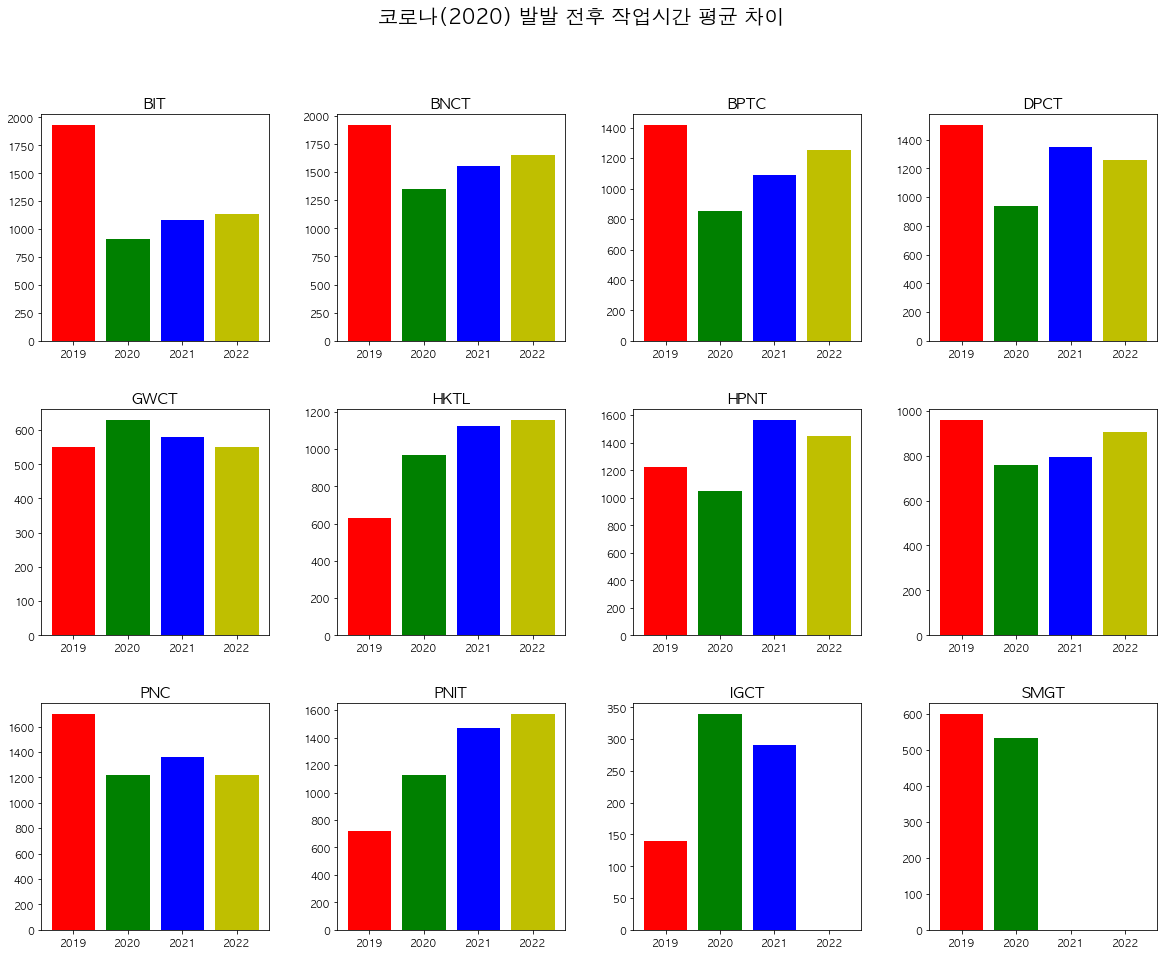

In [278]:
f, axes = plt.subplots(3,4)

f.set_size_inches((20,15))

f.suptitle('코로나(2020) 발발 전후 작업시간 평균 차이',fontsize = 20)


plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
axes[0][0].bar(x,y_bar('BIT'),color=['r','g','b','y'])
axes[0][0].set_title('BIT',fontsize = 15)
axes[0][1].bar(x,y_bar('BNCT'),color=['r','g','b','y'])
axes[0][1].set_title('BNCT',fontsize = 15)
axes[0][2].bar(x,y_bar('BPTC'),color=['r','g','b','y'])
axes[0][2].set_title('BPTC',fontsize = 15)
axes[0][3].bar(x,y_bar('DPCT'),color=['r','g','b','y'])
axes[0][3].set_title('DPCT',fontsize = 15)
axes[1][0].bar(x,y_bar('GWCT'),color=['r','g','b','y'])
axes[1][0].set_title('GWCT',fontsize = 15)
axes[1][1].bar(x,y_bar('HKTL'),color=['r','g','b','y'])
axes[1][1].set_title('HKTL',fontsize = 15)
axes[1][2].bar(x,y_bar('HPNT'),color=['r','g','b','y'])
axes[1][2].set_title('HPNT',fontsize = 15)
axes[1][3].bar(x,y_bar('ICT'),color=['r','g','b','y'])
axes[2][3].set_title('ICT',fontsize = 15)
axes[2][0].bar(x,y_bar('PNC'),color=['r','g','b','y'])
axes[2][0].set_title('PNC',fontsize = 15)
axes[2][1].bar(x,y_bar('PNIT'),color=['r','g','b','y'])
axes[2][1].set_title('PNIT',fontsize = 15)
axes[2][2].bar(x,IGCT,color=['r','g','b','y'])
axes[2][2].set_title('IGCT',fontsize = 15)
axes[2][3].bar(x,SMGT,color=['r','g','b','y'])
axes[2][3].set_title('SMGT',fontsize = 15)

plt.show()

In [281]:
SMGT_1 = [data_SMGT[data_SMGT['입항년도'] ==2019]['작업시간(분)'].iloc[0],data_SMGT[data_SMGT['입항년도'] ==2020]['작업시간(분)'].iloc[0],0,0]

In [282]:
IGCT_1 = [data_IGCT[data_IGCT['입항년도'] ==2019]['총 작업량'].iloc[0],data_IGCT[data_IGCT['입항년도'] ==2020]['총 작업량'].iloc[0],data_IGCT[data_IGCT['입항년도'] ==2021]['총 작업량'],0]

In [283]:
axes[0][1].bar(x,y_bar('BIT'))
plt.show()

In [284]:
def y_bar_1(x):
    data_x = data_1[data_1['TERMINAL']== x]
    x = [data_x[data_x['입항년도'] ==2019]['총 작업량'].iloc[0],data_x[data_x['입항년도'] ==2020]['총 작업량'].iloc[0],data_x[data_x['입항년도'] ==2021]['총 작업량'].iloc[0],data_x[data_x['입항년도'] ==2022]['총 작업량'].iloc[0]]
    
    return x

In [285]:
for i in list_2019_final:
    print(y_bar_1(i))

[1239.0, 546.7706270627062, 633.8395989974937, 655.9448529411765]
[2078.3333333333335, 1471.7958783120707, 1677.8340122199593, 1736.2743105950653]
[931.0, 494.538582183187, 591.4524756053488, 597.2287735849056]
[871.3333333333334, 609.1463414634146, 765.781520692974, 776.0357751277683]
[547.6666666666666, 454.458984375, 451.34001027221365, 415.0344522968198]
[376.0, 540.9135111876076, 622.3201735357918, 641.4986149584488]
[1873.0, 1224.168694241687, 1819.1961206896551, 1844.9488926746167]
[710.0, 708.6937984496124, 738.4026548672566, 756.2314049586777]
[2929.6666666666665, 1620.1440287032292, 1867.8058856819468, 1729.67506516073]
[1058.0, 1519.9086330935252, 1786.266261925412, 1891.028]


/Users/jihyeonbin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]
/Users/jihyeonbin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


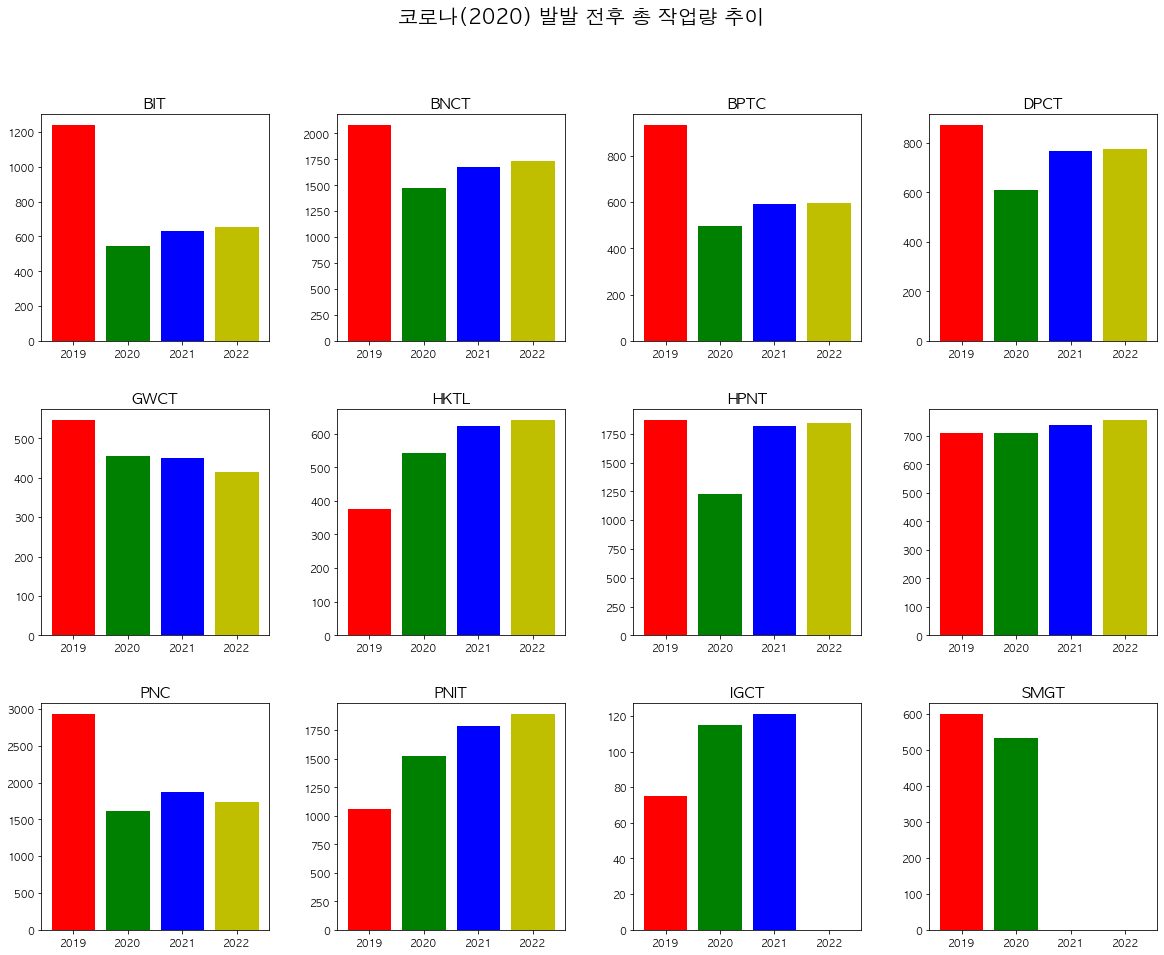

In [286]:
f, axes = plt.subplots(3,4)

f.set_size_inches((20,15))

f.suptitle('코로나(2020) 발발 전후 총 작업량 추이',fontsize = 20)


plt.subplots_adjust(wspace = 0.3,hspace = 0.3)
axes[0][0].bar(x,y_bar_1('BIT'),color=['r','g','b','y'])
axes[0][0].set_title('BIT',fontsize = 15)
axes[0][1].bar(x,y_bar_1('BNCT'),color=['r','g','b','y'])
axes[0][1].set_title('BNCT',fontsize = 15)
axes[0][2].bar(x,y_bar_1('BPTC'),color=['r','g','b','y'])
axes[0][2].set_title('BPTC',fontsize = 15)
axes[0][3].bar(x,y_bar_1('DPCT'),color=['r','g','b','y'])
axes[0][3].set_title('DPCT',fontsize = 15)
axes[1][0].bar(x,y_bar_1('GWCT'),color=['r','g','b','y'])
axes[1][0].set_title('GWCT',fontsize = 15)
axes[1][1].bar(x,y_bar_1('HKTL'),color=['r','g','b','y'])
axes[1][1].set_title('HKTL',fontsize = 15)
axes[1][2].bar(x,y_bar_1('HPNT'),color=['r','g','b','y'])
axes[1][2].set_title('HPNT',fontsize = 15)
axes[1][3].bar(x,y_bar_1('ICT'),color=['r','g','b','y'])
axes[2][3].set_title('ICT',fontsize = 15)
axes[2][0].bar(x,y_bar_1('PNC'),color=['r','g','b','y'])
axes[2][0].set_title('PNC',fontsize = 15)
axes[2][1].bar(x,y_bar_1('PNIT'),color=['r','g','b','y'])
axes[2][1].set_title('PNIT',fontsize = 15)
axes[2][2].bar(x,IGCT_1,color=['r','g','b','y'])
axes[2][2].set_title('IGCT',fontsize = 15)
axes[2][3].bar(x,SMGT_1,color=['r','g','b','y'])
axes[2][3].set_title('SMGT',fontsize = 15)

plt.show()

In [291]:
daf = pd.read_csv('전처리완료데이터.csv')
daf

,Unnamed: 0,BERTH_PLAN_LOG_ID,TERMINAL,VESSEL_CD,VOYAGE,BERTHN_DTM,DEP_DTM,LOD_CNT,DIS_CNT,SHFT_CNT,...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
0,0,1198857,BNCT,CATO,5,2019-12-30 10:36:00,2019-12-31 23:50:00,1100,539,88,...,0,0,0,4,2234.0,2019,12,30,10,1727
1,1,1198903,PNIT,DWFM,32,2019-12-31 17:00:00,2020-01-01 01:00:00,135,61,0,...,0,0,0,3,480.0,2019,12,31,17,196
2,3,1198958,PNC,ONIS,30,2019-12-31 11:00:00,2020-01-01 08:00:00,896,1000,0,...,0,0,0,6,1260.0,2019,12,31,11,1896
3,4,1198998,HJIT,DPUX,1,2020-01-01 01:00:00,2020-01-01 05:20:00,0,238,0,...,0,2,1,0,260.0,2020,1,1,1,238
4,5,1199009,HPNT,HHBS,1,2019-12-31 11:12:00,2020-01-01 04:00:00,405,641,120,...,2,0,0,2,1008.0,2019,12,31,11,1166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60592,69780,3545253,GWCT,SMLB,1,2022-08-08 12:30:00,2022-08-09 02:00:00,273,577,92,...,0,0,0,4,810.0,2022,8,8,12,942
60593,69781,3545254,GWCT,NITR,10,2022-08-08 21:30:00,2022-08-09 07:00:00,0,365,0,...,0,0,0,4,570.0,2022,8,8,21,365
60594,69782,3545255,GWCT,DYHY,13,2022-08-09 08:30:00,2022-08-09 15:30:00,72,52,0,...,0,0,0,4,420.0,2022,8,9,8,124
60595,69784,3545257,PNC,MGUD,3,2022-08-09 07:00:00,2022-08-10 03:00:00,972,715,354,...,0,0,0,6,1200.0,2022,8,9,7,2041


In [292]:
corr = daf[['TERMINAL','VESSEL_CD','VOYAGE','BERTHN_DTM','DEP_DTM','LOD_CNT','DIS_CNT','SHFT_CNT','기온(°C)','강수량(mm)','풍속(m/s)','위치','부두길이(m)','전면수심(m)','부지면적(^m)','하역능력(TEU)','접안능력(1만)','접안능력(2만)','접안능력(3만)','접안능력(4만)','접안능력(5만톤)','작업시간(분)','입항년도','입항월','입항일','입항시','총 작업량']].corr(method = 'pearson')
corr

,VOYAGE,LOD_CNT,DIS_CNT,SHFT_CNT,기온(°C),강수량(mm),풍속(m/s),전면수심(m),부지면적(^m),하역능력(TEU),...,접안능력(2만),접안능력(3만),접안능력(4만),접안능력(5만톤),작업시간(분),입항년도,입항월,입항일,입항시,총 작업량
VOYAGE,1.000000,-0.132851,-0.123936,-0.065405,0.051636,0.000639,-0.005848,-0.206272,-0.084862,-0.109416,...,-0.082943,0.099004,0.388944,-0.112571,-0.094545,-0.026927,0.193846,0.017631,0.010010,-0.145561
LOD_CNT,-0.132851,1.000000,0.568750,0.243309,-0.000675,-0.002436,0.069248,0.254430,0.145811,0.306988,...,0.045765,-0.104692,-0.062742,0.215320,0.670424,0.027589,0.005479,0.016087,-0.005091,0.868258
DIS_CNT,-0.123936,0.568750,1.000000,0.391463,-0.001225,0.002464,0.071348,0.251927,0.130192,0.285675,...,0.060578,-0.095926,-0.051444,0.209060,0.660217,0.024785,0.008895,0.007092,-0.006652,0.893403
SHFT_CNT,-0.065405,0.243309,0.391463,1.000000,0.013595,0.000131,0.032709,0.154676,0.081062,0.183981,...,0.076082,-0.079783,-0.056171,0.126596,0.315877,0.027730,0.007243,0.000824,-0.007771,0.453266
기온(°C),0.051636,-0.000675,-0.001225,0.013595,1.000000,0.063292,0.033060,0.002322,0.039510,0.035994,...,0.009814,-0.065637,-0.053729,0.038269,0.003278,0.020756,0.314135,0.018091,0.096767,0.000456
강수량(mm),0.000639,-0.002436,0.002464,0.000131,0.063292,1.000000,0.036711,-0.001465,0.005919,0.008940,...,-0.008114,-0.014000,-0.007720,0.013031,0.003504,-0.009152,0.016781,-0.007814,0.002885,0.000080
풍속(m/s),-0.005848,0.069248,0.071348,0.032709,0.033060,0.036711,1.000000,0.068082,0.058687,0.146450,...,-0.087933,-0.040214,0.012804,0.082818,0.114221,0.028722,-0.058514,0.002009,0.117418,0.079430
전면수심(m),-0.206272,0.254430,0.251927,0.154676,0.002322,-0.001465,0.068082,1.000000,0.374261,0.500682,...,0.116121,-0.070819,-0.102845,0.381540,0.148012,-0.077255,-0.006964,0.001892,-0.010519,0.289998
부지면적(^m),-0.084862,0.145811,0.130192,0.081062,0.039510,0.005919,0.058687,0.374261,1.000000,0.842987,...,-0.207964,-0.445892,-0.355459,0.792522,0.139311,-0.040809,-0.012996,-0.005338,-0.014740,0.157568
하역능력(TEU),-0.109416,0.306988,0.285675,0.183981,0.035994,0.008940,0.146450,0.500682,0.842987,1.000000,...,-0.176392,-0.459864,-0.327144,0.785666,0.258448,-0.045337,-0.005395,-0.001999,-0.009209,0.339558


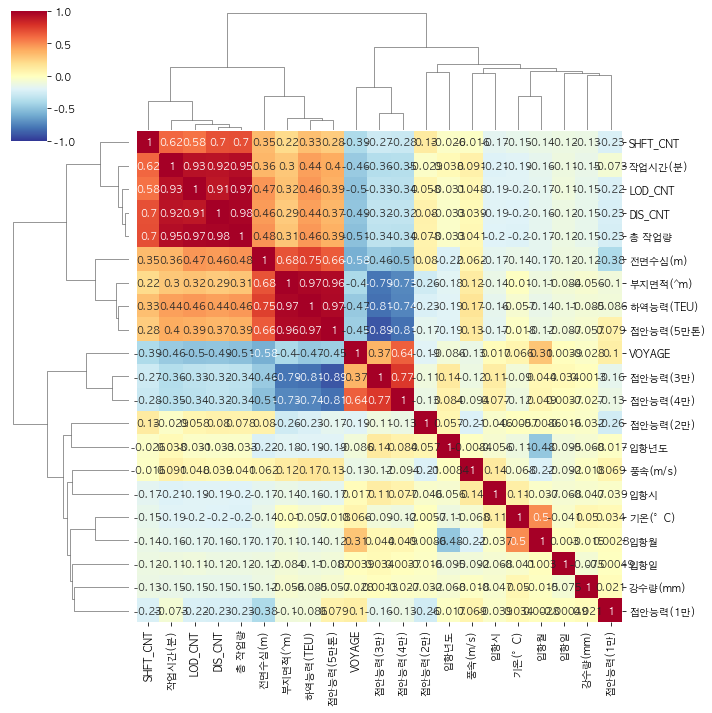

In [293]:
df = corr.corr()
sns.clustermap(df,
              annot= True,
              cmap = 'RdYlBu_r',
              vmin = -1, vmax = 1)

In [ ]:
plt.bar(daf['TERMINAL'],daf['총 작업량'])
plt.rc('xtick', 4)